<a href="https://colab.research.google.com/github/FabricioCruzDev/AnaliseDeDados/blob/master/EngenhariaDados/LevantarIndicadoresRFM/DesafioDataCleaning-DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Data Cleaning - DataWrangling

## Objetivo


---

**Levantar os indicadores de recência, frequência e ticket médio (RFM) dos clientes**



*   R (Recency): Tempo que o cliente realizou a última compra (em dias).
*   F (Frequency): Quantidade de compras realizadas pelo cliente.
*   M (Monetary): Valor do ticket médio gasto pelo cliente.



In [ ]:
# Imports
import numpy as np
import pandas as pd

from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact

## Input

Arquivo csv contendo os dados coletados pela empresa.

Contém a identificação do cliente e dados da compra.

---



### Dicionário

CustomerID   ->  Código de identificação do cliente

Description  ->  Descrição do produto

InvoiceNo    ->  Código da fatura

StockCode    ->  Código de estoque do produto

Quantity     ->  Quantidade do produto

InvoiceDate  ->  Data do faturamento (compra)

UnitPrice    ->  Preço unitário do produto

Country      ->  País da compra **negrito**
  

In [ ]:
# Upload do arquivo csv

#uploaded = files.upload()

## Análise exploratória

In [ ]:
# Criando dataset

df_in = pd.read_csv('/content/drive/MyDrive/PosGraduacao/ExtracaoTratamentoDadosPython/desafio/data.csv', sep= ",",  encoding= 'iso-8859-1')
df_in.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_in.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df_in.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df_in.duplicated().sum()

5268

**OBSERVAÇÕES**


1.   Dados faltantes nas colunas Description e CustomerID
2.   Tipo de dados da coluna CustomerID float64, o idel seria object
4.   Tipo de dados da coluna InvoiceDate object, o idel seria datetime
3.   Há dados duplicados

**PREMISSAS**


1.   Preços unitários e quantidade de produtos iguais ou inferior a 0.
2.   Considerar como outlier:

                            * Quantidade superior a 10000
                            * Preço unitário maior que 5000.



## Tratamento

**Removendo dados nulos coluna CustomerID**

In [ ]:
df_in.dropna(subset=['CustomerID'], inplace = True)
df_in.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


**Removendo os registros duplicados**

In [ ]:
df_in = df_in.drop_duplicates()
df_in.duplicated().sum()

0

**Alterando o tipo de dados da coluna CustomerID**

In [ ]:
df_in['CustomerID'] = df_in['CustomerID'].astype('int')
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  int64  
 7   Country      401604 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.6+ MB


**Alterando o tipo de dados da coluna InvoiceDate**

In [ ]:
df_in['InvoiceDate'] = pd.to_datetime(df_in['InvoiceDate'])
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


**Preços unitários e quantidade de produtos iguais ou inferior a 0**

In [ ]:
df_in = df_in.loc[~((df_in['UnitPrice'] <= 0) | (df_in['Quantity'] <= 0))]
df_in

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
df_in[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


**Removendo outliers conforme as premissas de negócio**

In [ ]:
df_in = df_in.loc[~((df_in['UnitPrice'] > 10000) | (df_in['Quantity'] > 5000))]
df_in

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


### Criando coluna adicional com o preço total da compra

In [ ]:
df = df_in.copy()
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392690 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392690 non-null  object        
 1   StockCode    392690 non-null  object        
 2   Description  392690 non-null  object        
 3   Quantity     392690 non-null  int64         
 4   InvoiceDate  392690 non-null  datetime64[ns]
 5   UnitPrice    392690 non-null  float64       
 6   CustomerID   392690 non-null  int64         
 7   Country      392690 non-null  object        
 8   Total        392690 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


**Salvando a última data**

In [ ]:
df['Date'] = df['InvoiceDate'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
max_date = df['Date'].max()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09


## Gráficos

### Top 10 países com maior valor de vendas

In [ ]:
sns.set_theme(style = "whitegrid")

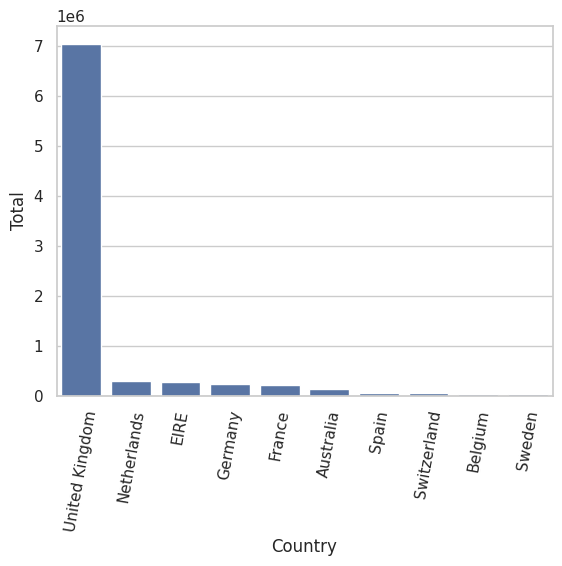

In [ ]:
sns.barplot(df.groupby(df.Country)['Total'].sum().sort_values(ascending= False).head(10))
plt.xticks(rotation=80);

### Top 10 produtos mais vendidos

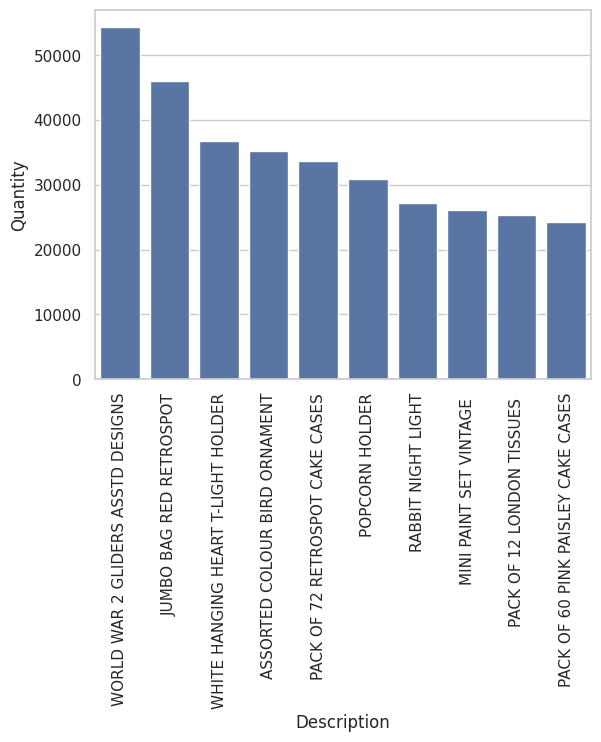

In [ ]:
sns.barplot(df.groupby(df.Description)['Quantity'].sum().sort_values(ascending= False).head(10))
plt.xticks(rotation=90);

### Valor de venda total por mês

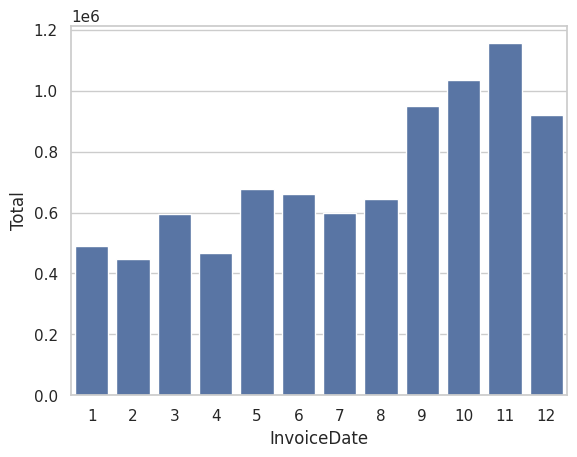

In [ ]:
total_sales_by_month = pd.DataFrame(df.groupby(df.InvoiceDate.dt.month)['Total'].sum())
sns.barplot(total_sales_by_month, x = 'InvoiceDate', y= 'Total');

### Valor de venda total por mês e por país (Top 10)

In [ ]:
month = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
print('Selecione o mês desejado:')
@interact(mes=month)

def month_graph(mes):
  sns.barplot(df[(df['InvoiceDate'].dt.month == month.index(mes)+1)].
  groupby('Country')['Total'].sum().
  sort_values(ascending = False).head(10))
  plt.xticks(rotation=90)
  plt.title(mes)
  plt.show();


Selecione o mês desejado:


interactive(children=(Dropdown(description='mes', options=('Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', '…

## Cálculo do RFM

In [ ]:
df_customer_invoice = df.groupby([df.CustomerID, 'InvoiceNo', 'Date'])['Total'].sum().reset_index()
df_customer_invoice

,CustomerID,InvoiceNo,Date,Total
0,12347,537626,2010-12-07,711.79
1,12347,542237,2011-01-26,475.39
2,12347,549222,2011-04-07,636.25
3,12347,556201,2011-06-09,382.52
4,12347,562032,2011-08-02,584.91
...,...,...,...,...
18525,18283,579673,2011-11-30,220.31
18526,18283,580872,2011-12-06,208.00
18527,18287,554065,2011-05-22,765.28
18528,18287,570715,2011-10-12,1001.32


### Data da última compra

Cálculo auxiliar para encontrar a Recência.

In [ ]:
df_customer = pd.DataFrame(df_customer_invoice.groupby(['CustomerID'])['Date'].max())
df_customer.rename(columns={'Date':'LastOrder'}, inplace=True)

### Recência

In [ ]:
df_r = df_customer.copy()
df_r['Recency'] = (max_date - df_customer['LastOrder']).dt.days
df_r

,LastOrder,Recency
CustomerID,,
12347,2011-12-07,2
12348,2011-09-25,75
12349,2011-11-21,18
12350,2011-02-02,310
12352,2011-11-03,36
...,...,...
18280,2011-03-07,277
18281,2011-06-12,180
18282,2011-12-02,7


### Frequência

In [ ]:
df_f = pd.DataFrame(df_customer_invoice.groupby('CustomerID')['InvoiceNo'].count())
df_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
df_f

,Frequency
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8
...,...
18280,1
18281,1
18282,2


### Total de Compras por Cliente

Cálculo auxiliar para encontrar o valor do tickt médio.

In [ ]:
#Total de Compras por Cliente
df_t = pd.DataFrame(df_customer_invoice.groupby(['CustomerID'])['Total'].sum())
df_t

,Total
CustomerID,
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
12352,2506.04
...,...
18280,180.60
18281,80.82
18282,178.05


### Join

In [ ]:
df_rfm = pd.DataFrame(df_r.join([df_f, df_t], how='inner')).reset_index()

### Ticket Médio

In [ ]:
df_rfm['MeanTicket'] = round(df_rfm['Total'] / df_rfm['Frequency'],2)
df_rfm

,CustomerID,LastOrder,Recency,Frequency,Total,MeanTicket
0,12347,2011-12-07,2,7,4310.00,615.71
1,12348,2011-09-25,75,4,1797.24,449.31
2,12349,2011-11-21,18,1,1757.55,1757.55
3,12350,2011-02-02,310,1,334.40,334.40
4,12352,2011-11-03,36,8,2506.04,313.26
...,...,...,...,...,...,...
4332,18280,2011-03-07,277,1,180.60,180.60
4333,18281,2011-06-12,180,1,80.82,80.82
4334,18282,2011-12-02,7,2,178.05,89.02
4335,18283,2011-12-06,3,16,2045.53,127.85


### Dados adionais

Como sub-produto do cálculo utilizado para obter o RFM, foi mantido no dataframe as informações contendo a última data de compra e to toal de compras realizadas por consumidor.

## Output

Arquivo csv contendo os dados tratados

---



### Dicionário

CustomerID   ->  Código de identificação do cliente

LastOrder -> Data do último pedido do cliente

Recency  ->  Diferença entre a última compra do cliente e a data da última compra registrada

Frequency  ->  Frequência, quantidade de compras feitas pelo cliente.

Total -> Valor total somando todas as compras do cliente.

MeanTicket  ->  Ticket médio

In [ ]:
df_rfm.to_csv('/content/drive/MyDrive/PosGraduacao/ExtracaoTratamentoDadosPython/desafio/rfm.csv', sep=',', index=False)